In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 20
import warnings
import itertools
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# - Time series dataset retrieving and cleaning

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/sensor analytics/Time_Series_CO2_Forecasting-master/MER_T12_06.csv")
df.head()

,MSN,Month,Value,Column_Order,Description,Unit
0,CLEIEUS,197301,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1,CLEIEUS,197302,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
2,CLEIEUS,197303,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
3,CLEIEUS,197304,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
4,CLEIEUS,197305,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5094 entries, 0 to 5093
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSN           5094 non-null   object
 1   Month         5094 non-null   int64 
 2   Value         5094 non-null   object
 3   Column_Order  5094 non-null   int64 
 4   Description   5094 non-null   object
 5   Unit          5094 non-null   object
dtypes: int64(2), object(4)
memory usage: 238.9+ KB


In [ ]:
# Changing Month from int to Date
dateparse = lambda x: pd.to_datetime(x, format='%Y%m', errors = 'coerce') #coerce to have a NaN field in empty or corrupted
df = pd.read_csv("/content/drive/MyDrive/sensor analytics/Time_Series_CO2_Forecasting-master/MER_T12_06.csv", parse_dates=['Month'], index_col='Month', date_parser=dateparse) 
df.head()

,MSN,Value,Column_Order,Description,Unit
Month,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [ ]:
#drop all rows with null index 
#ts = time serie
ts = df[pd.Series(pd.to_datetime(df.index, errors='coerce')).notnull().values]
ts.head(15)

,MSN,Value,Column_Order,Description,Unit
Month,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-06-01,CLEIEUS,66.538,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-07-01,CLEIEUS,72.626,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-08-01,CLEIEUS,75.181,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-09-01,CLEIEUS,68.397,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [ ]:
#
ts = df[pd.Series(pd.to_datetime(df.index, errors='coerce')).notnull().values]
ts.head(15)

,MSN,Value,Column_Order,Description,Unit
Month,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-06-01,CLEIEUS,66.538,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-07-01,CLEIEUS,72.626,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-08-01,CLEIEUS,75.181,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-09-01,CLEIEUS,68.397,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [ ]:
ts['Value'] = pd.to_numeric(ts['Value'] , errors='coerce')
ts.head()

,MSN,Value,Column_Order,Description,Unit
Month,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [ ]:
ts.dropna(inplace = True)

# - Data Vizualisation

In [ ]:
# sources = CO2 sources
sources = ts.groupby('Description')
ts.head(15)

,MSN,Value,Column_Order,Description,Unit
Month,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-06-01,CLEIEUS,66.538,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-07-01,CLEIEUS,72.626,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-08-01,CLEIEUS,75.181,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-09-01,CLEIEUS,68.397,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


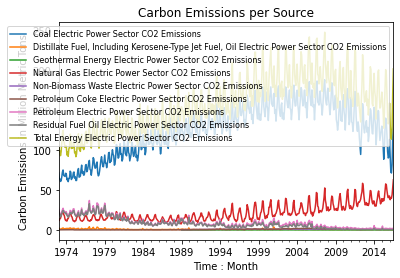

In [ ]:
fig, ax = plt.subplots()
for desc, grp in sources:
    grp.plot( y='Value', label=desc,ax = ax, title='Carbon Emissions per Source', fontsize = 10)
    ax.set_xlabel('Time : Month')
    ax.set_ylabel('Carbon Emissions in Million Metric Tons')
    ax.xaxis.label.set_size(10)
    ax.yaxis.label.set_size(10)
    ax.legend(fontsize = 8, )

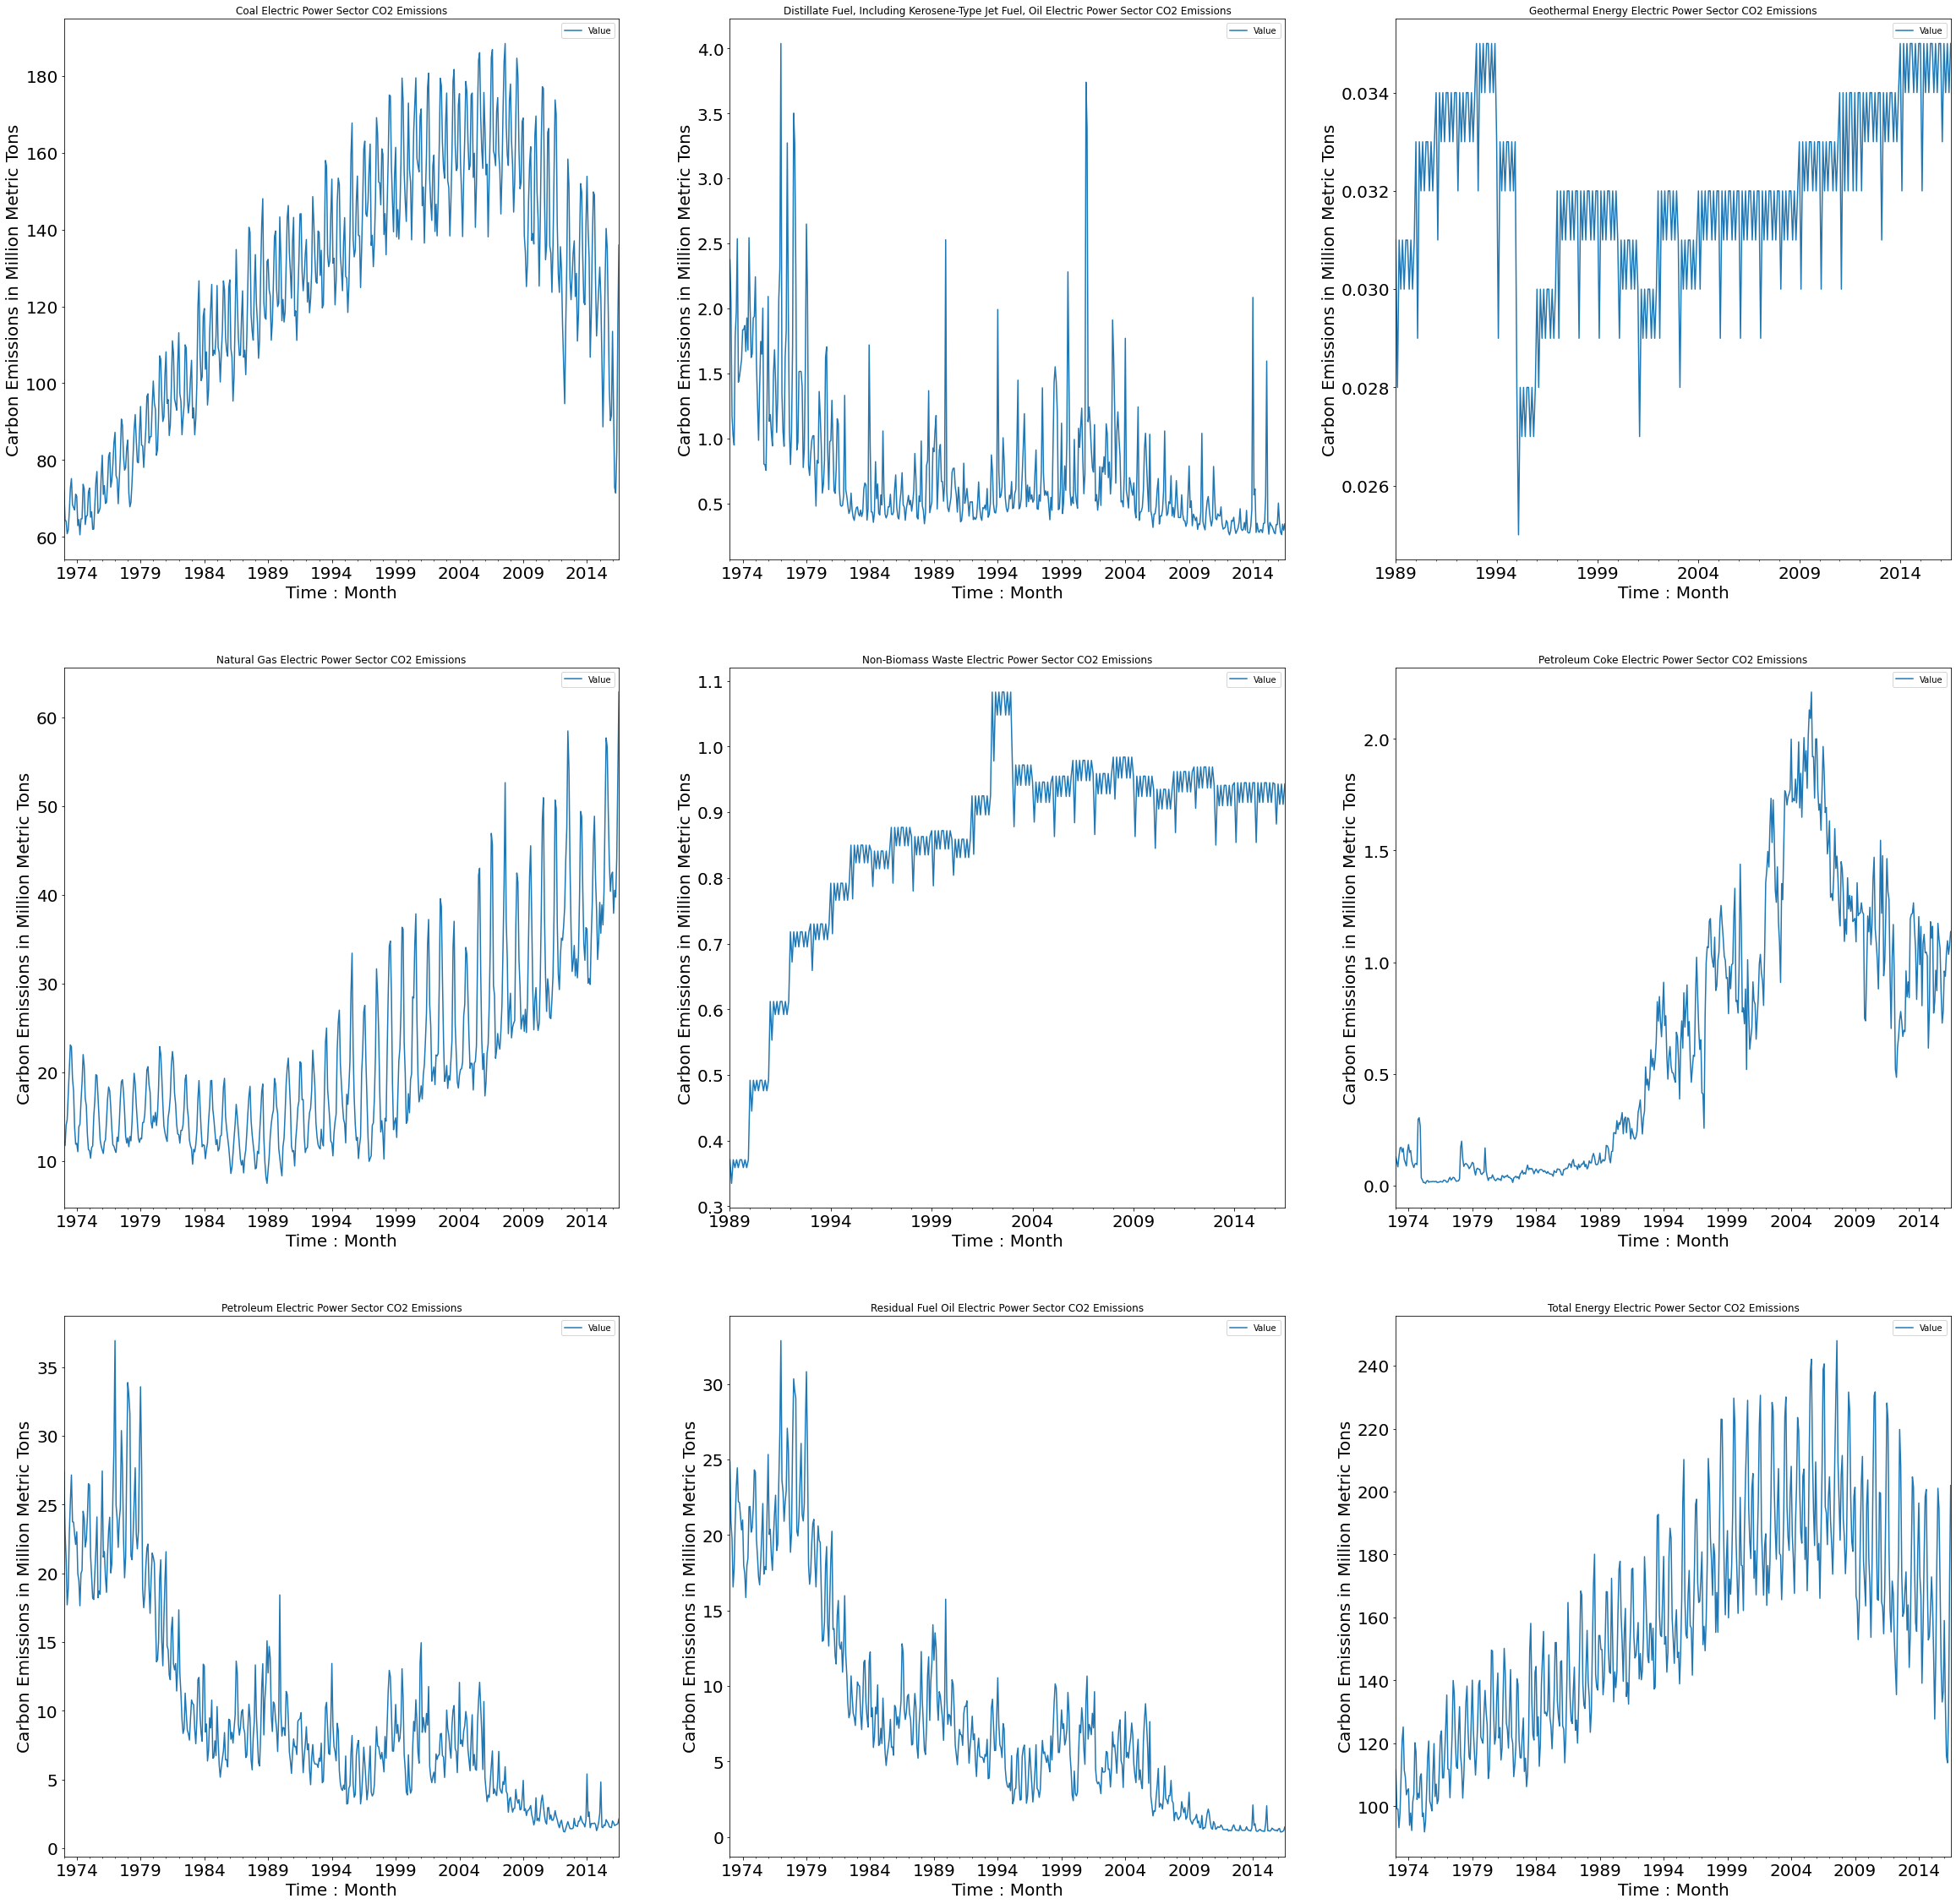

In [ ]:
#Plot per Emission source
fig, axes = plt.subplots(3,3, figsize = (40, 40))
for (desc, group), ax in zip(sources, axes.flatten()):
    group.plot(y='Value',ax = ax, title=desc, fontsize = 20)
    ax.set_xlabel('Time : Month')
    ax.set_ylabel('Carbon Emissions in Million Metric Tons')
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)


# - Emission by Sector

In [ ]:
QuantityPerSource = ts.groupby('Description')['Value'].sum().sort_values()
src = ['Geothermal Energy', 'Non-Biomass Waste', 'Petroleum Coke','Distillate Fuel ',
        'Residual Fuel Oil', 'Petroleum', 'Natural Gas', 'Coal', 'Full Emissions']

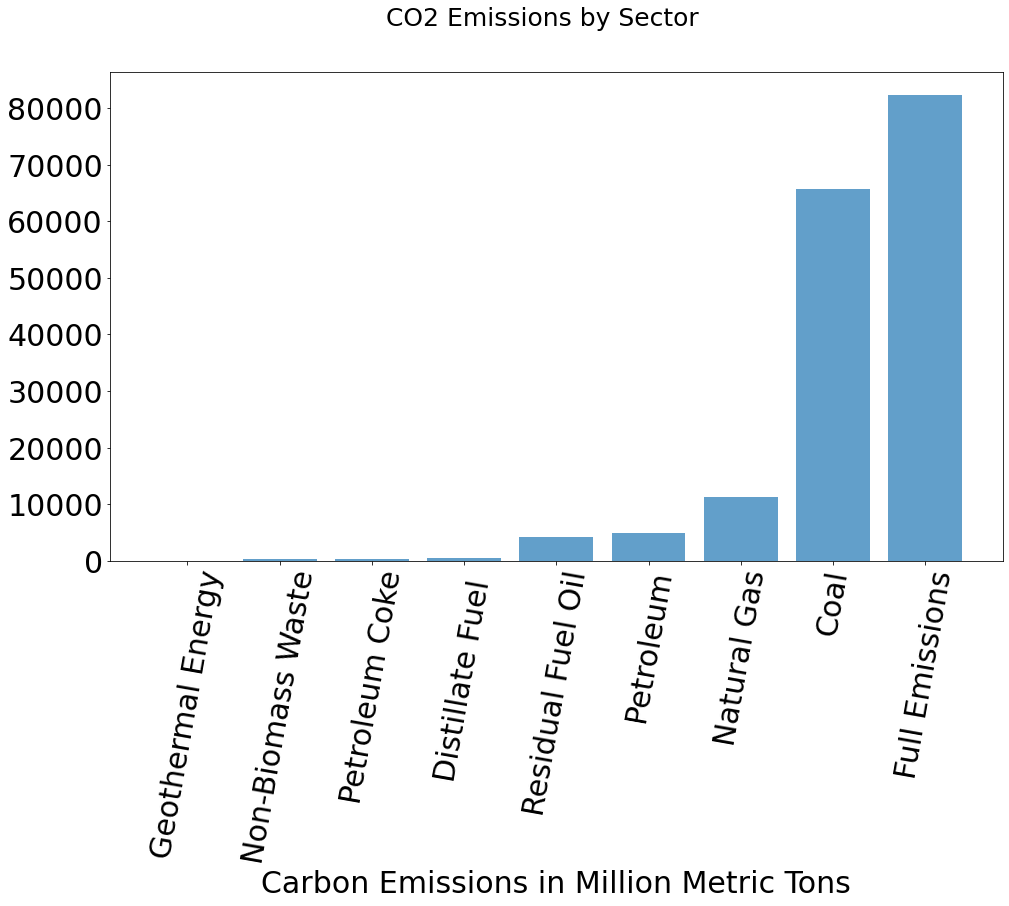

In [ ]:
fig = plt.figure(figsize = (16,9))
x_label = src
x_tick = np.arange(len(src))
plt.bar(x_tick, QuantityPerSource, align = 'center', alpha = 0.7)
fig.suptitle("CO2 Emissions by Sector", fontsize= 25)
plt.xticks(x_tick, x_label, rotation = 80, fontsize = 30 )
plt.yticks(fontsize = 30)
plt.xlabel('Carbon Emissions in Million Metric Tons', fontsize = 30)
plt.show()

# We will make our forecasting for 1 emission , i chosed the Petroleum Emission

             Value
Month             
1973-01-01  27.369
1973-02-01  23.034
1973-03-01  21.034
1973-04-01  17.714
1973-05-01  18.870


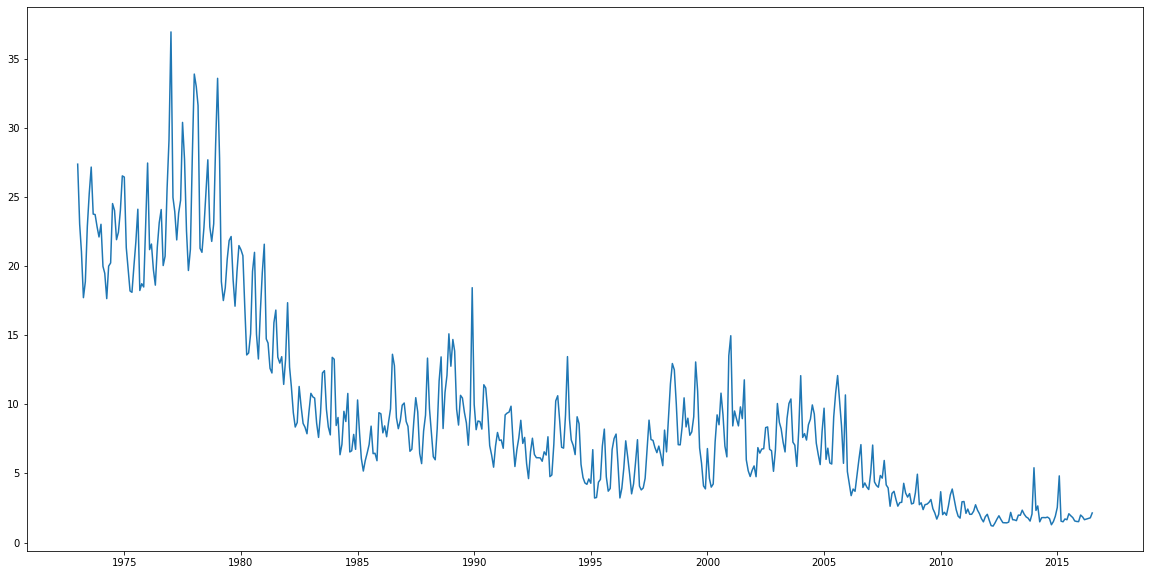

In [ ]:
# ems = emissions
ems = ts.drop(['MSN','Column_Order','Unit'], axis=1)  # droping columns and leting only value and description column
# Petroleum total emissions (pte)
pte = ems[ems['Description'] =="Petroleum Electric Power Sector CO2 Emissions"]
pte = pte.drop(['Description'], axis=1)
print(pte.head())
plt.figure(figsize=(20,10))
plt.plot(pte)

In [ ]:
ems = ts.drop(['MSN','Column_Order','Unit'], axis=1)  # droping columns and leting only value and description column
# Petroleum total emissions (pte)
ems['Description'].unique()

array(['Coal Electric Power Sector CO2 Emissions',
       'Natural Gas Electric Power Sector CO2 Emissions',
       'Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions',
       'Petroleum Coke Electric Power Sector CO2 Emissions',
       'Residual Fuel Oil Electric Power Sector CO2 Emissions',
       'Petroleum Electric Power Sector CO2 Emissions',
       'Geothermal Energy Electric Power Sector CO2 Emissions',
       'Non-Biomass Waste Electric Power Sector CO2 Emissions',
       'Total Energy Electric Power Sector CO2 Emissions'], dtype=object)

             Value
Month             
1973-01-01  72.076
1973-02-01  64.442
1973-03-01  64.084
1973-04-01  60.842
1973-05-01  61.798


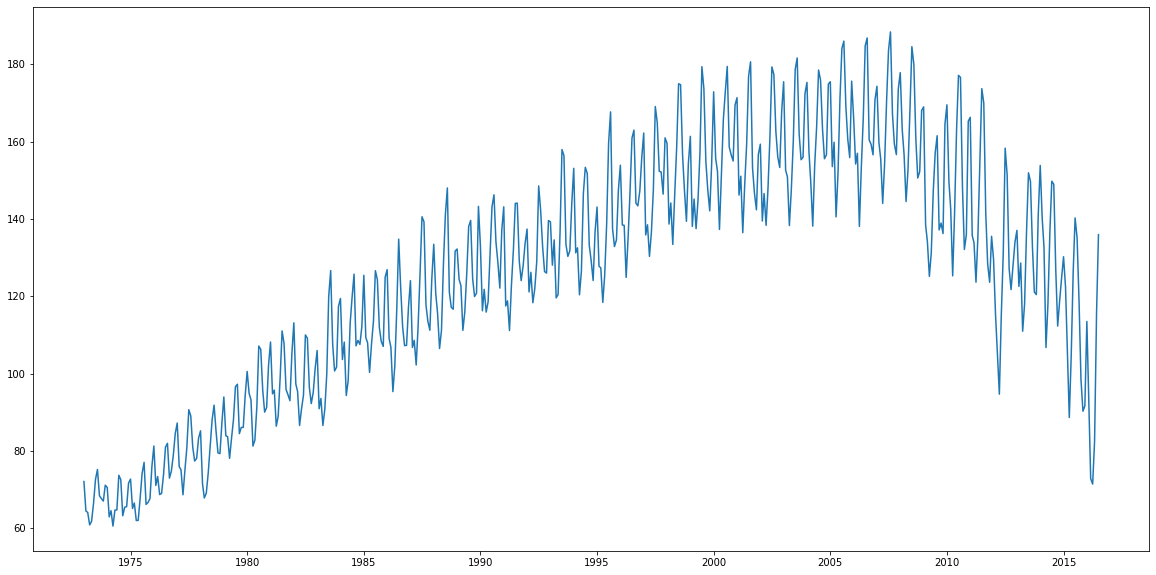

In [ ]:
# ems = emissions
ems = ts.drop(['MSN','Column_Order','Unit'], axis=1)  # droping columns and leting only value and description column
# Petroleum total emissions (pte)
cte = ems[ems['Description'] =="Coal Electric Power Sector CO2 Emissions"]
cte = cte.drop(['Description'], axis=1)
print(cte.head())
plt.figure(figsize=(20,10))
plt.plot(cte)

             Value
Month             
1973-01-01  12.175
1973-02-01  11.708
1973-03-01  13.994
1973-04-01  14.627
1973-05-01  17.344


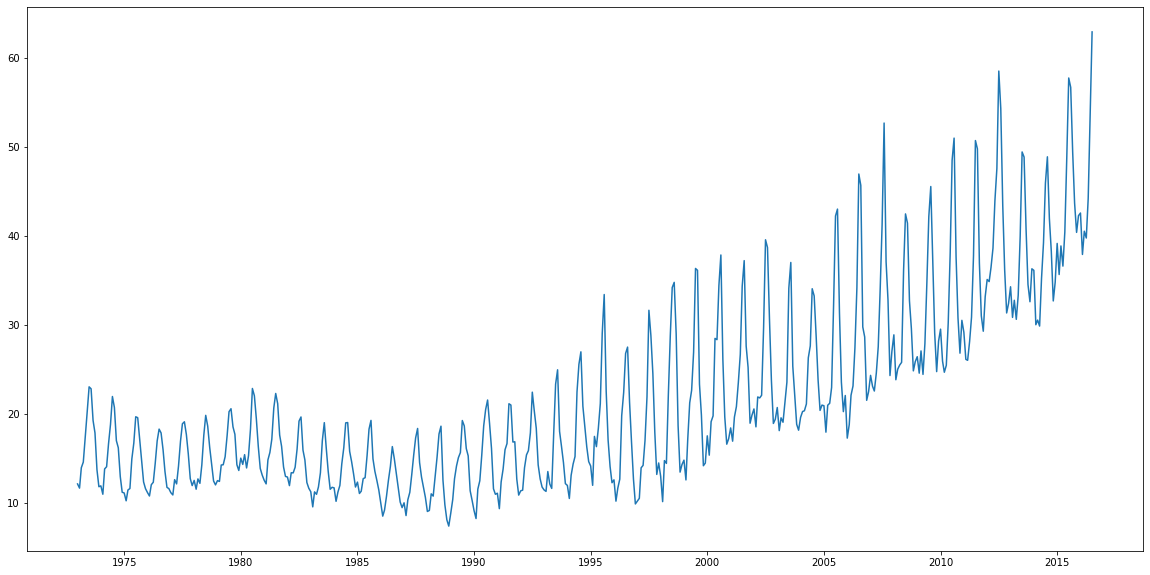

In [ ]:
# ems = emissions
ems = ts.drop(['MSN','Column_Order','Unit'], axis=1)  # droping columns and leting only value and description column
# Petroleum total emissions (pte)
nge = ems[ems['Description'] =="Natural Gas Electric Power Sector CO2 Emissions"]
nge = nge.drop(['Description'], axis=1)
print(nge.head())
plt.figure(figsize=(20,10))
plt.plot(nge)

              Value
Month              
1973-01-01  111.621
1973-02-01   99.185
1973-03-01   99.112
1973-04-01   93.183
1973-05-01   98.012


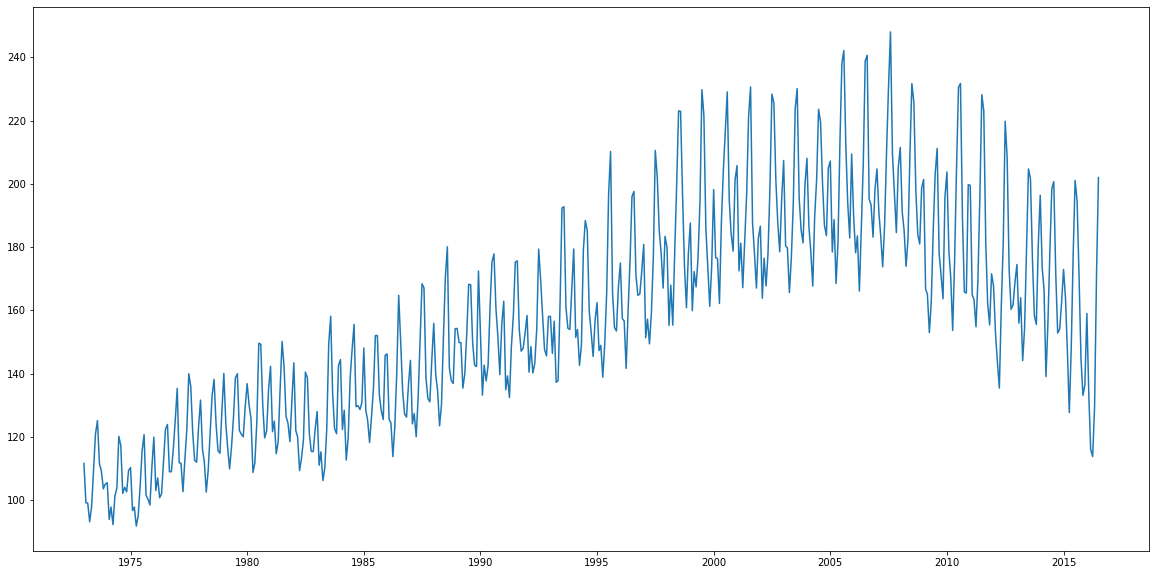

In [ ]:
# ems = emissions
ems = ts.drop(['MSN','Column_Order','Unit'], axis=1)  # droping columns and leting only value and description column
# Petroleum total emissions (pte)
te = ems[ems['Description'] =="Total Energy Electric Power Sector CO2 Emissions"]
te = te.drop(['Description'], axis=1)
print(te.head())
plt.figure(figsize=(20,10))
plt.plot(te)

#CCF test

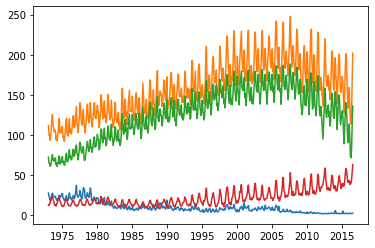

In [ ]:
plt.plot(pte)
plt.plot(te)
plt.plot(cte)
plt.plot(nge)

In [ ]:
moving_avg = pte.rolling(12).mean()
pte_trans = pte - moving_avg
pte_trans  = pte_trans.iloc[13:]
pte_trans.head

<bound method NDFrame.head of                Value
Month               
1974-02-01 -2.381083
1974-03-01 -2.750417
1974-04-01 -4.578583
1974-05-01 -2.323167
1974-06-01 -1.872833
...              ...
2016-03-01 -0.078250
2016-04-01 -0.053250
2016-05-01 -0.008250
2016-06-01  0.026167
2016-07-01  0.373417

[510 rows x 1 columns]>

In [ ]:
moving_avg = te.rolling(12).mean()
te_trans = te - moving_avg
te_trans  = te_trans.iloc[13:]
te_trans.head

<bound method NDFrame.head of                 Value
Month                
1974-02-01 -12.322417
1974-03-01  -8.288833
1974-04-01 -13.778667
1974-05-01  -4.993417
1974-06-01  -2.044667
...               ...
2016-03-01 -37.511083
2016-04-01 -38.535333
2016-05-01 -21.394750
2016-06-01  21.716333
2016-07-01  51.525500

[510 rows x 1 columns]>

In [ ]:
moving_avg = cte.rolling(12).mean()
cte_trans = cte - moving_avg
cte_trans.head(13)
cte_trans = cte_trans.iloc[13:]

In [ ]:
moving_avg = nge.rolling(12).mean()
nge_trans = nge - moving_avg
nge_trans = nge_trans.iloc[13:]

In [ ]:
from statsmodels.tsa.stattools import ccf
from statsmodels.tsa.stattools import ccovf
backwards = ccf(nge_trans['Value'][::-1],te_trans['Value'][::-1], unbiased=False)[::-1]
forwards = ccf(nge_trans['Value'],te_trans['Value'], unbiased=False)
ccf_output = np.r_[backwards[:-1], forwards]

In [ ]:
backwards = ccf(pte_trans['Value'][::-1],te_trans['Value'][::-1], unbiased=False)[::-1]
forwards = ccf(pte_trans['Value'],te_trans['Value'], unbiased=False)
ccf_output1 = np.r_[backwards[:-1], forwards]

In [ ]:
backwards = ccf(cte_trans['Value'][::-1],te_trans['Value'][::-1], unbiased=False)[::-1]
forwards = ccf(cte_trans['Value'],te_trans['Value'], unbiased=False)
ccf_output2 = np.r_[backwards[:-1], forwards]

In [ ]:
ccf_output

array([-0.0059385 , -0.00549601, -0.00144887, ..., -0.00560999,
       -0.00478523, -0.00418967])

(array([-50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39, -38,
        -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25,
        -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12,
        -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,
          2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
         15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
         41,  42,  43,  44,  45,  46,  47,  48,  49,  50]),
 array([-0.1387211 ,  0.17701524,  0.4040488 ,  0.17848755, -0.15993504,
        -0.32355286, -0.18364335,  0.13222356,  0.22378808,  0.0904381 ,
        -0.2011123 , -0.33425396, -0.14919823,  0.17611135,  0.40040493,
         0.18133541, -0.1410616 , -0.2917413 , -0.15719005,  0.16298173,
         0.26077664,  0.12278403, -0.19010355, -0.32891703, -0.13952713,
         0.18109953,  0.41008277,  0.210143  , -0.12273517, -0.2

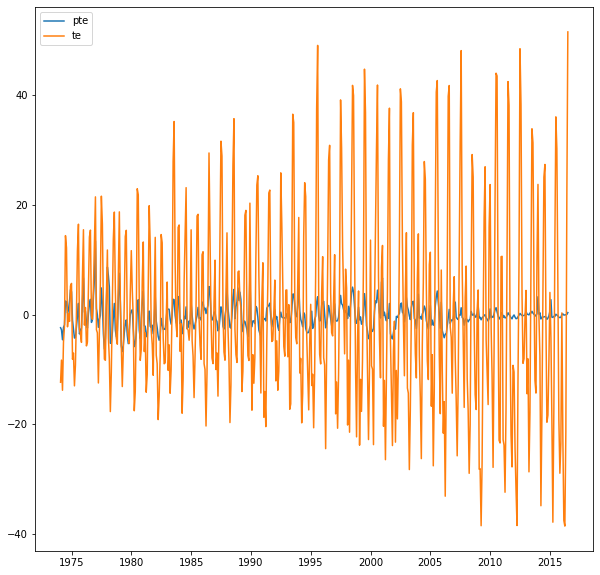

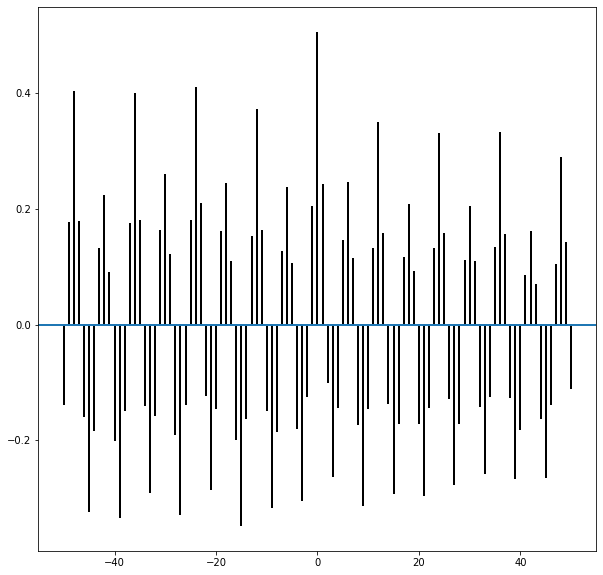

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(pte_trans, label = 'pte')
plt.plot(te_trans, label = 'te')
plt.legend()
plt.figure(figsize=(10,10))
plt.xcorr(pte_trans['Value'], te_trans['Value'] , usevlines=True, maxlags=50, normed=True, lw=2)

(array([-50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39, -38,
        -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25,
        -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12,
        -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,
          2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
         15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
         41,  42,  43,  44,  45,  46,  47,  48,  49,  50]),
 array([-0.08854855,  0.41029026,  0.76903192,  0.41046966, -0.14542789,
        -0.51339236, -0.40816589,  0.01637145,  0.21189116,  0.12921105,
        -0.25473463, -0.39157563, -0.08741334,  0.42044898,  0.78552004,
         0.42571346, -0.1324419 , -0.5048227 , -0.39977339,  0.04027431,
         0.24631169,  0.15723213, -0.25137226, -0.41873612, -0.11860136,
         0.39241707,  0.75895397,  0.39051892, -0.18239029, -0.5

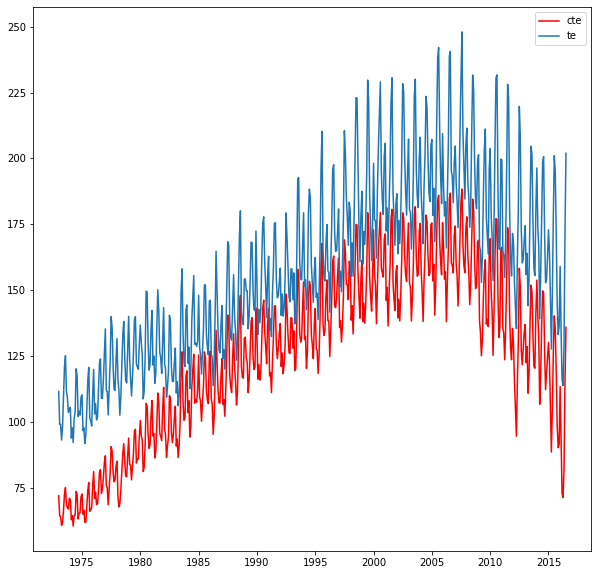

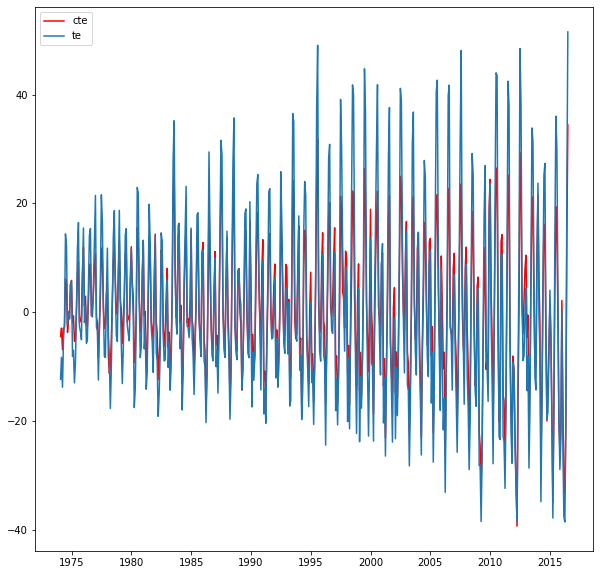

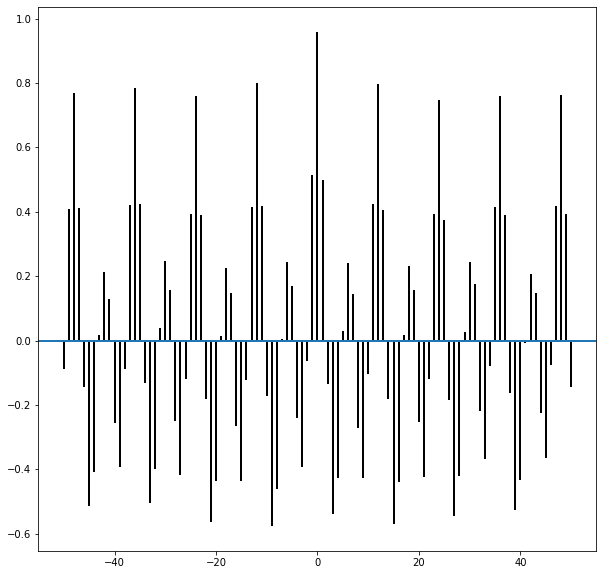

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(cte, label = 'cte', color = "red")
plt.plot(te, label = 'te')
plt.legend()
plt.figure(figsize=(10,10))
plt.plot(cte_trans, label = 'cte', color = "red")
plt.plot(te_trans, label = 'te')
plt.legend()
plt.figure(figsize=(10,10))
plt.xcorr(te_trans['Value'], cte_trans['Value'] , usevlines=True, maxlags=50, normed=True, lw=2)

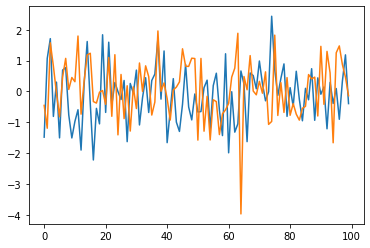

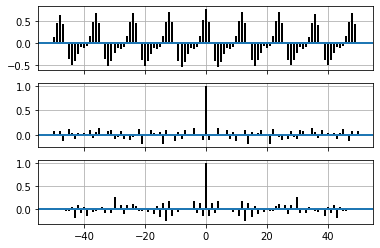

In [ ]:
x, y = np.random.randn(2, 100)
plt.plot(x)
plt.plot(y)
fig, [ax1, ax2, ax3] = plt.subplots(3, 1, sharex=True)
ax1.xcorr(nge_trans['Value'], te_trans['Value'] , usevlines=True, maxlags=50, normed=True, lw=2)
ax1.grid(True)

ax2.acorr(x, usevlines=True, normed=True, maxlags=50, lw=2)
ax2.grid(True)

ax3.acorr(y, usevlines=True, normed=True, maxlags=50, lw=2)
ax3.grid(True)
plt.show()

# - Stationarity test
## mean , variance and covariance are constant over time

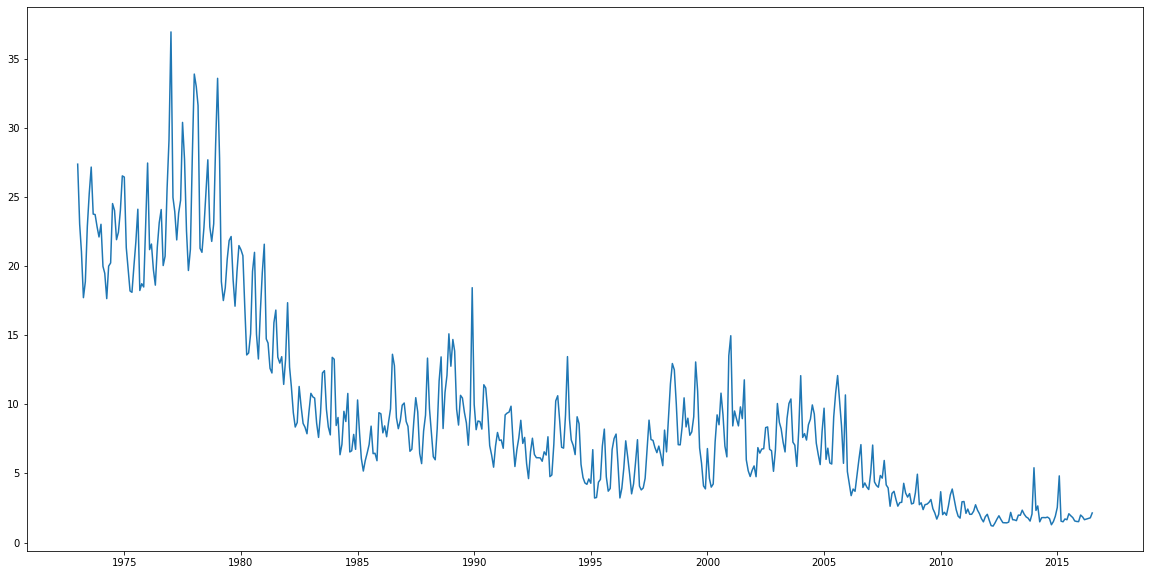

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(pte)
# same result 

Text(0.5, 0.98, 'Decomposition Results')

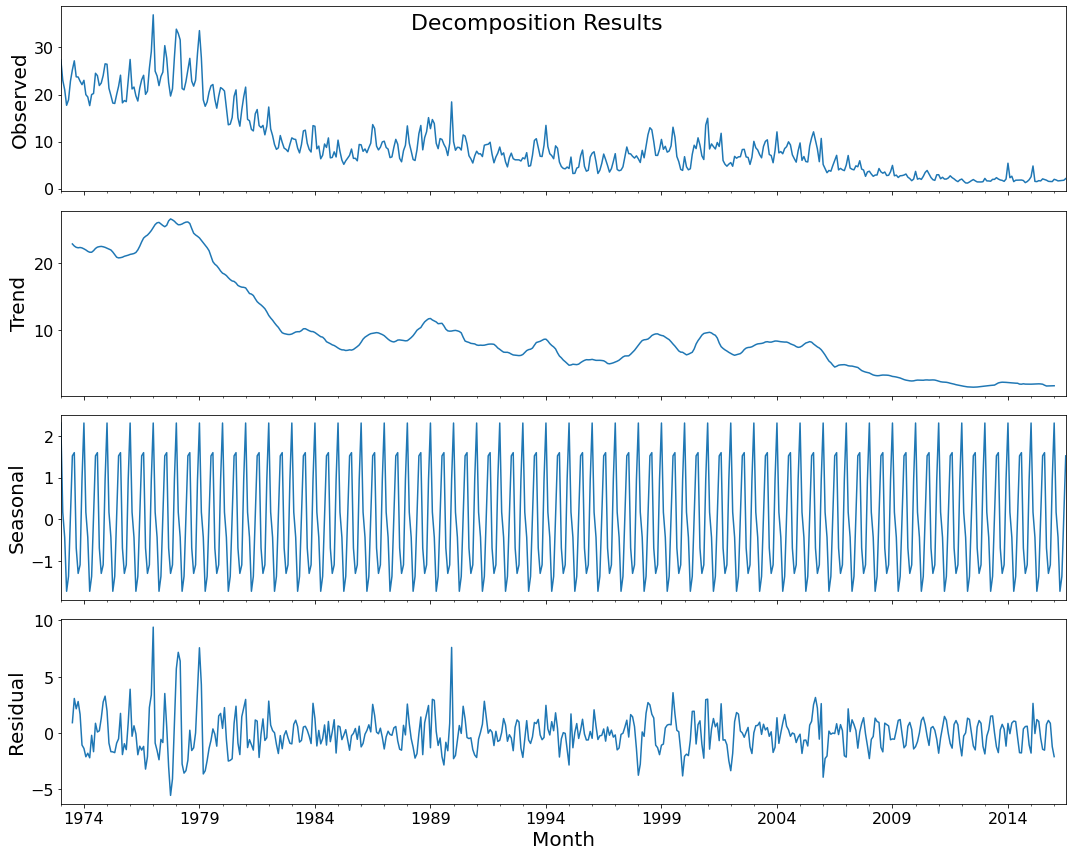

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 12
rcParams['axes.labelsize'] = 20
rcParams['ytick.labelsize'] = 16
rcParams['xtick.labelsize'] = 16
decomposition = sm.tsa.seasonal_decompose(pte, model='additive')
decomp = decomposition.plot()
decomp.suptitle('Decomposition Results', fontsize=22)

# From the figures, there is a trend in the CO2 emission dataset with seasonal variation. So it's evident that the dataset is not stationary.

# - Test stationary using Dickey-Fuller Augmentation 
## the time serie is stationary if the p value is low (null by hypothesis) and if the critical values at confidence intervals of 1%, 5%, 10% are as close as possible to the statistics of the ADF (Augmented Dickey-Fuller)

In [ ]:
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA 
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

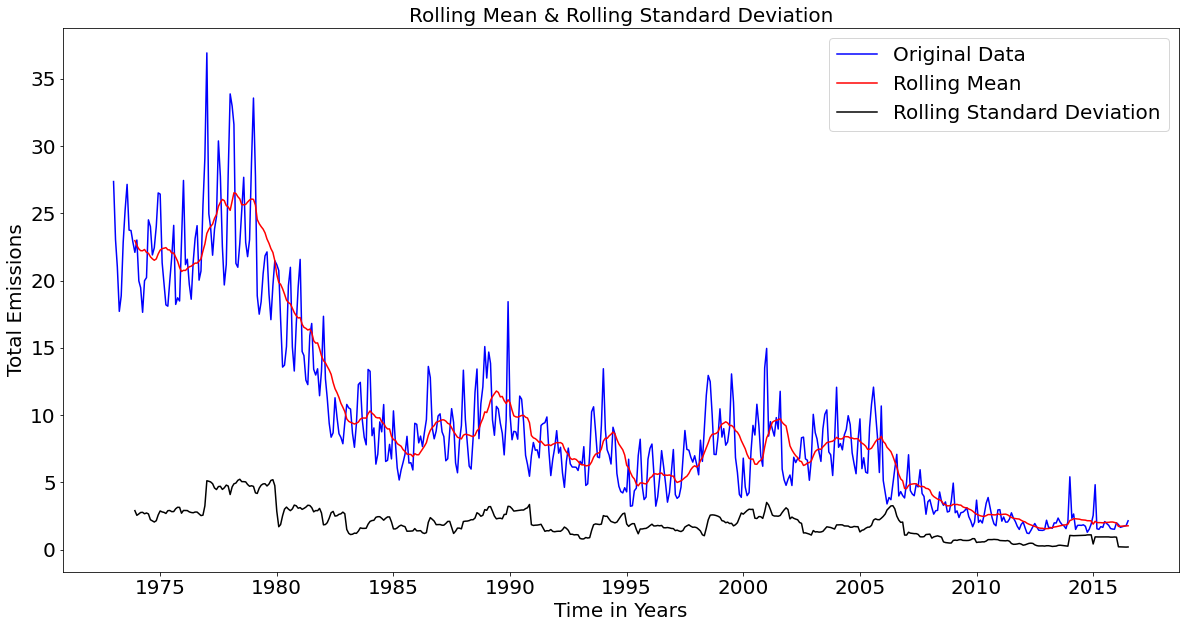

In [ ]:
def TestStationaryPlt(pte):
    rolling_mean = pte.rolling(window = 12, center = False).mean()
    rolling_std = pte.rolling(window = 12, center = False).std()   
    plt.figure(figsize=(20,10))
    plt.plot(pte, color = 'blue',label = 'Original Data')
    plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rolling_std, color ='black', label = 'Rolling Standard Deviation')
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)    
    plt.xlabel('Time in Years', fontsize = 20)
    plt.ylabel('Total Emissions', fontsize = 20)   
    plt.legend(loc='best', fontsize = 20)
    plt.title('Rolling Mean & Rolling Standard Deviation', fontsize = 20)
    plt.show()
TestStationaryPlt(pte)

In [ ]:
def Adf_test(pte):
    result = adfuller(pte['Value'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))
Adf_test(pte)

ADF Statistic: -1.5772399363509195
p-value: 0.4950157307222791
Critical Values:
	1%: -3.44328828958775
	5%: -2.8672462791357867
	10%: -2.569809231353463


# - The ADF statistic is far from the critical values and the p-value is above the threshold (0.05). We can conclude that the time series is not stationary.

# - Transform the time serie to stationary

## to transform the time serie to a stationary one we will chose to substract the moving average from the original serie

In [ ]:
moving_avg = pte.rolling(12).mean()
pte_trans = pte - moving_avg
pte_trans.head(13)

,Value
Month,
1973-01-01,NaN
1973-02-01,NaN
1973-03-01,NaN
1973-04-01,NaN
1973-05-01,NaN
1973-06-01,NaN
1973-07-01,NaN
1973-08-01,NaN
1973-09-01,NaN


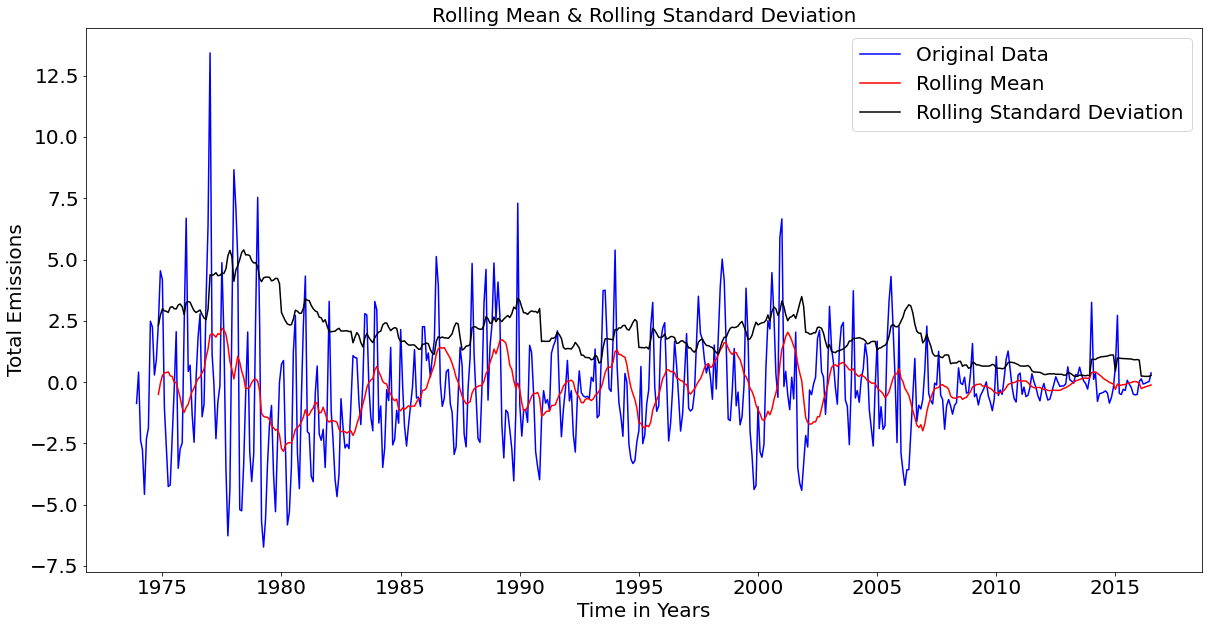

In [ ]:
pte_trans.dropna(inplace=True)
TestStationaryPlt(pte_trans)

In [ ]:
Adf_test(pte_trans)

ADF Statistic: -6.416719923762991
p-value: 1.8335421773119023e-08
Critical Values:
	1%: -3.4435761493506294
	5%: -2.867372960189225
	10%: -2.5698767442886696


## The Test Statistic is smaller than the 10% 5%, and 1% of critical values and the p value tend to 0. So, we can say that the time serie is a stationary serie

In [ ]:
# - Find optimal parameters and build an ARIMA model

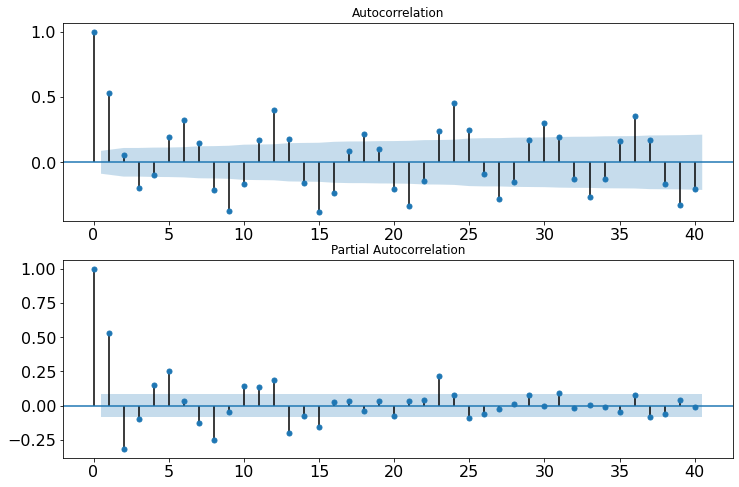

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(pte_trans.iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(pte_trans.iloc[13:], lags=40, ax=ax2)

#Using AIC

In [ ]:
def optimize_ARIMA(order_list, exog):
    """
        Return dataframe with parameters and corresponding AIC
        
        order_list - list with (p, d, q) tuples
        exog - the exogenous variable
    """
    
    results = []
    
    for order in order_list:
        try: 
            model = sm.tsa.statespace.SARIMAX(exog, order=order).fit(disp=-1)
        except:
            continue
            
        aic = model.aic
        results.append([order, model.aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p, d, q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    #result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [ ]:

from itertools import product
ps = range(0, 8, 1)
d = 1
qs = range(0, 8, 1)
# Create a list with all possible combination of parameters
parameters = product(ps, qs)
parameters_list = list(parameters)
order_list = []
for each in parameters_list:
    each = list(each)
    each.insert(1, 1)
    each = tuple(each)
    order_list.append(each)
print(order_list)
result_df = optimize_ARIMA(order_list, exog=pte)
result_df

[(0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 1, 3), (0, 1, 4), (0, 1, 5), (0, 1, 6), (0, 1, 7), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 1, 3), (1, 1, 4), (1, 1, 5), (1, 1, 6), (1, 1, 7), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 1, 3), (2, 1, 4), (2, 1, 5), (2, 1, 6), (2, 1, 7), (3, 1, 0), (3, 1, 1), (3, 1, 2), (3, 1, 3), (3, 1, 4), (3, 1, 5), (3, 1, 6), (3, 1, 7), (4, 1, 0), (4, 1, 1), (4, 1, 2), (4, 1, 3), (4, 1, 4), (4, 1, 5), (4, 1, 6), (4, 1, 7), (5, 1, 0), (5, 1, 1), (5, 1, 2), (5, 1, 3), (5, 1, 4), (5, 1, 5), (5, 1, 6), (5, 1, 7), (6, 1, 0), (6, 1, 1), (6, 1, 2), (6, 1, 3), (6, 1, 4), (6, 1, 5), (6, 1, 6), (6, 1, 7), (7, 1, 0), (7, 1, 1), (7, 1, 2), (7, 1, 3), (7, 1, 4), (7, 1, 5), (7, 1, 6), (7, 1, 7)]


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-

,"(p, d, q)",AIC
0,"(0, 1, 0)",2341.903543
1,"(0, 1, 1)",2343.746090
2,"(0, 1, 2)",2251.816573
3,"(0, 1, 3)",2227.688969
4,"(0, 1, 4)",2228.933639
...,...,...
59,"(7, 1, 3)",2170.053577
60,"(7, 1, 4)",2098.648938
61,"(7, 1, 5)",2079.374088
62,"(7, 1, 6)",2067.049607


Text(0, 0.5, 'AIC  score')

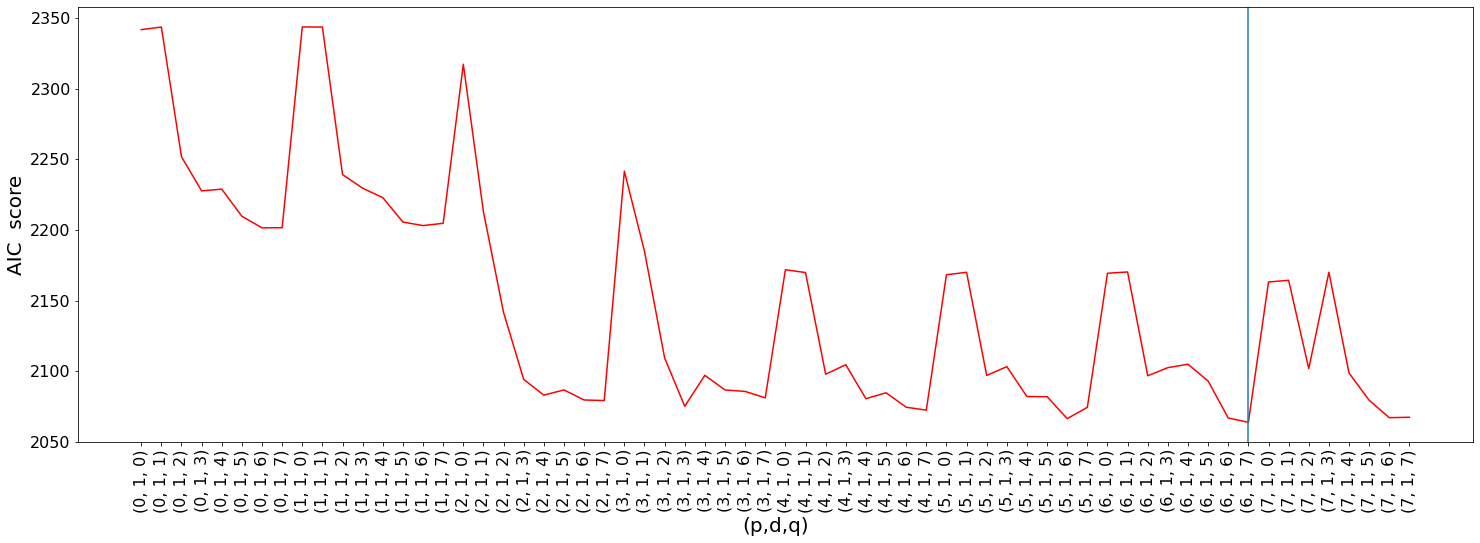

In [ ]:
result_d = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
plt.figure(figsize=(25,8))
plt.plot([str(i) for i in result_df['(p, d, q)']],result_df['AIC'], color = "red");
plt.xticks(rotation = 90);
plt.axvline(x=str(result_d['(p, d, q)'][0]))
plt.xlabel("(p,d,q)")
plt.ylabel("AIC  score")

# - Fitting our Forecasting Model

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(pte_trans,order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Value   No. Observations:                  511
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1069.116
Method:                       css-mle   S.D. of innovations              1.951
Date:                Fri, 29 Jan 2021   AIC                           2146.233
Time:                        00:39:15   BIC                           2163.178
Sample:                    01-01-1974   HQIC                          2152.876
                         - 07-01-2016                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0008      0.001      0.642      0.521      -0.002       0.003
ar.L1.D.Value     0.5407      0.037     14.485      0.000       0.468       0.614
ma.L1.D.Value    -0.9999      0.005   -189.049      0.000      -1.010      -0.990
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.8496           +0.0000j            1.8496            0.0000
MA.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

### We’ll start by plugging the optimal parameter values into a new SARIMAX model:

In [ ]:
mod = sm.tsa.statespace.SARIMAX(pte, 
                                order=(6,1,7), 
                                seasonal_order=(0,1,1,12),   
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1194      0.190      0.630      0.529      -0.252       0.491
ar.L2         -0.0398      0.193     -0.206      0.837      -0.418       0.339
ar.L3         -0.6958      0.132     -5.265      0.000      -0.955      -0.437
ar.L4          0.3112      0.129      2.404      0.016       0.058       0.565
ar.L5         -0.1120      0.177     -0.632      0.527      -0.459       0.235
ar.L6         -0.4680      0.110     -4.253      0.000      -0.684      -0.252
ma.L1         -0.4490      0.194     -2.320      0.020      -0.828      -0.070
ma.L2         -0.0976      0.185     -0.527      0.598      -0.461       0.265
ma.L3          0.6942      0.114      6.088      0.000       0.471       0.918
ma.L4         -0.6587      0.105     -6.288      0.000      -0.864      -0.453
ma.L5          0.1116      0.177      0.631      0.5

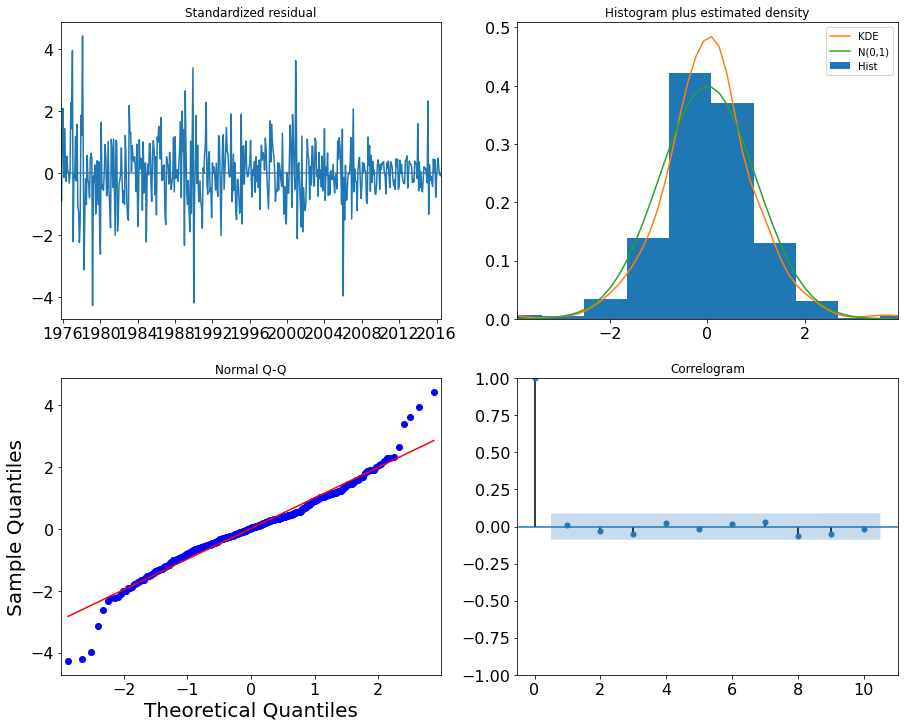

In [ ]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

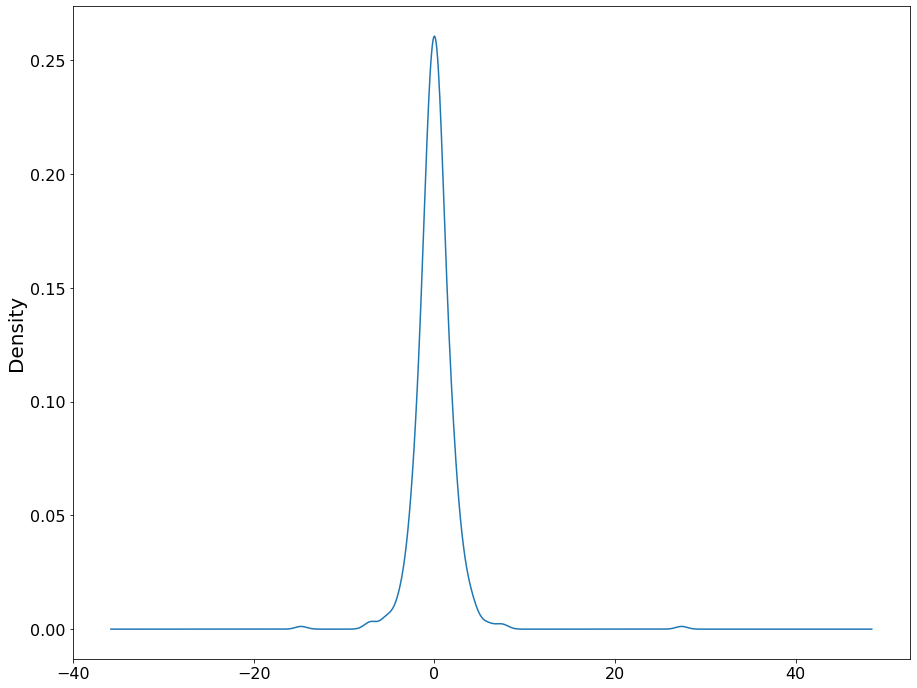

In [ ]:
# gaussian residual error
results.resid.plot(kind='kde')

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=False)
pred_ci = pred.conf_int()
pred_ci.head()

,lower Value,upper Value
1998-01-01,4.990775,11.561975
1998-02-01,2.426246,8.997435
1998-03-01,2.017418,8.588598
1998-04-01,2.667921,9.239100
1998-05-01,3.075694,9.646870


# - Printing forecasting values of the time series

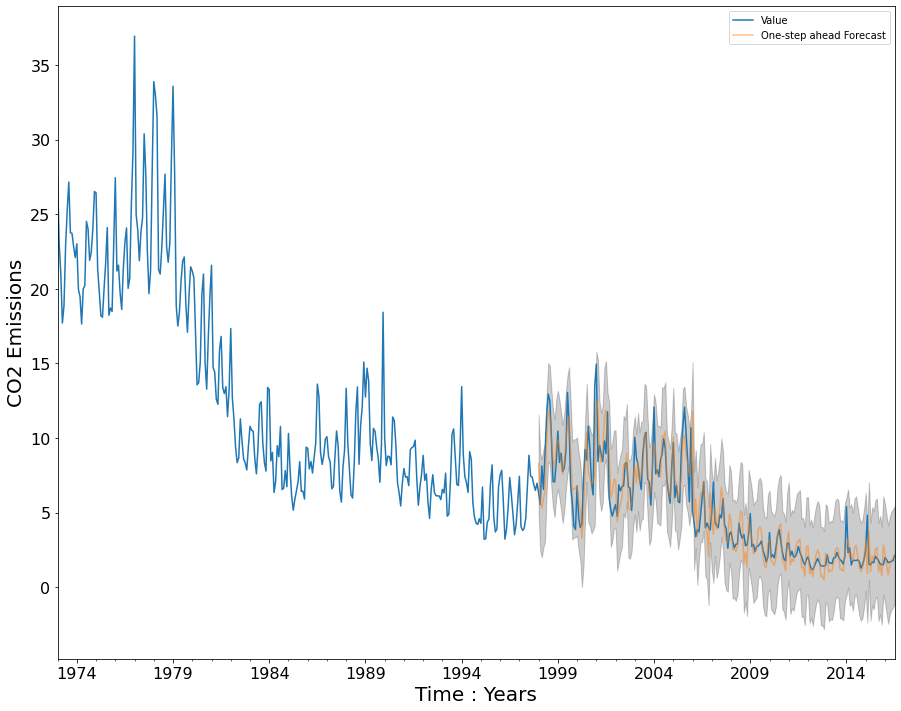

In [ ]:
ax = pte['1973':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.5)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Time : Years')
ax.set_ylabel('CO2 Emissions')
plt.legend()

plt.show()

----------------------------------------------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------------------------------------------------

#Quiz
\\

Recall that a model’s BIC is given by

BIC =−2 ln(L) + k ln(n),

where $ln(L)$ is the natural logarithm of the maximized likelihood function and $k$ is thenumber of parameters in the model. Which statement is true?

(a) The smaller the BIC, the better the model.

(b) When compared to the AIC, BIC offers a stiffer penalty for models with a large number of parameters.

(c) Both (a) and (b) are true.

(d) Neither (a) nor (b) are true.

solution: c

\\

Excluding the intercept $θ_0$ and white noise variance $σ^2_e$, which model has the largest number of parameters?

(a) ARIMA$(1,1,1)×(2,0,1)_{12}$

(b) ARMA$(3,3)$

(c) ARMA$(1,1)×(1,2)_4$

(d) ARIMA$(2,2,3)$

Solution: d

\\

 	

Which of the following conditions are necessary for a series to be classifiable as a weakly stationary process?

(i) It must have a constant mean

(ii) It must have a constant variance

(iii) It must have constant autocovariances for given lags

(iv) It must have a constant probability distribution

a) 	(ii) and (iv) only

b) 	(i) and (iii) only

c) 	(i), (ii), and (iii) only

d) 	(i), (ii), (iii), and (iv)

Solution: c

\\

Which of the following statements are true concerning the acf and pacf?

(i) The acf and pacf are often hard to interpret in practice

(ii) The acf and pacf can be difficult to calculate for some data sets

(iii) Information criteria represent an alternative approach to model order determination

(iv) If applied correctly, the acf and pacf will always deliver unique model selections

a) 	(ii) and (iv) only

b) 	(i) and (iii) only

c) 	(i), (ii), and (iii) only

d) 	(i), (ii), (iii), and (iv)

Solution: c

\\


An ARMA(p,q) (p, q are integers bigger than zero) model will have
	
a) 	An acf and pacf that both decline geometrically
	
b) 	An acf that declines geometrically and a pacf that is zero after p lags

c) 	An acf that declines geometrically and a pacf that is zero after q lags
	
d) 	An acf that is zero after p lags and a pacf that is zero after q lags

Solution: a

\\

 	

Which of the following statements are true concerning the autocorrelation function (acf) and partial autocorrelation function (pacf)?

i) The acf and pacf will always be identical at lag one whatever the model

ii) The pacf for an MA(q) model will in general be non-zero beyond lag q

iii) The pacf for an AR(p) model will be zero beyond lag p

iv) The acf and pacf will be the same at lag two for an MA(1) model

a) 	(ii) and (iv) only

b) 	(i) and (iii) only

c) 	(i), (ii), and (iii) only

d) 	(i), (ii), (iii), and (iv)

Solution: c

------------------------------------------------------------------------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------------------------------------------------------------------------

#Assignment

Forecast the carbon emission for different energy sector.

a) Report parameter estimation using ACF and PACF graph

b) Report parameter estimation using AIC and BIC

c) Report upper and lower predicted values for the first five months of 1988.